<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula2b_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=0):
  X = np.random.uniform(size=(n,2))
  AUX = np.multiply(X, slop)-[0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

slop=[-1,2]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.11121561, 0.40462056],
        [0.61222015, 0.76057774],
        [0.0395456 , 0.16360647],
        [0.86788339, 0.28431399],
        [0.23544247, 0.49498172],
        [0.71807395, 0.4342992 ],
        [0.41972661, 0.0682346 ],
        [0.63282581, 0.74326742],
        [0.82528103, 0.62589053],
        [0.3124997 , 0.65504518],
        [0.89313013, 0.48366682],
        [0.72468379, 0.54563965],
        [0.0476568 , 0.92972143],
        [0.73928921, 0.31489264],
        [0.67113687, 0.14133489],
        [0.18588378, 0.49540488],
        [0.04094132, 0.44673883],
        [0.43565262, 0.96123577],
        [0.86622333, 0.1130225 ],
        [0.80932804, 0.71540496]]),
 array([ 1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1]))

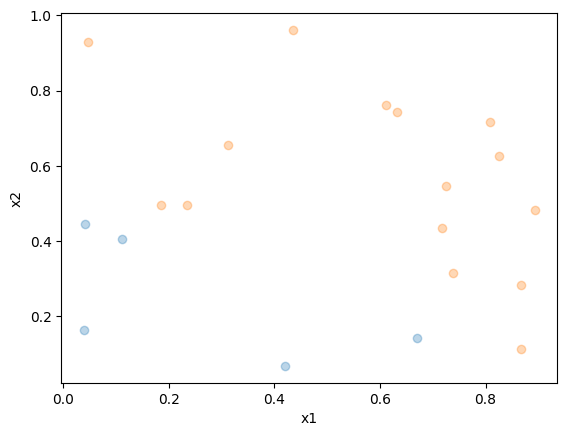

In [80]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.xlabel('x1')
  plt.ylabel('x2')
  for k in set(y):
    plt.plot(X[:,0][y==k],X[:,1][y==k], 'o', alpha=0.3)

plotDataset(X, y)

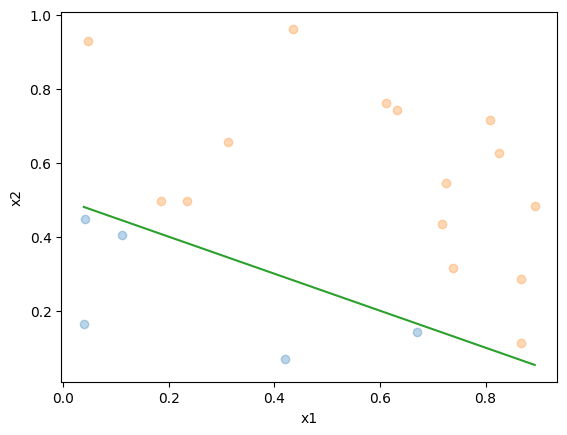

In [81]:
def plotHiperplano(X, y, vetor, intercept=0):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X, y, vetor_hiperplano, intercept)

In [82]:
def sign(a):
  return (a >= 0) * 2 -1

In [83]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y, activation=None):
    pass

class PseudoInversa():
  def getW(self, X, y):
    return np.linalg.pinv(X) @ y

class DescidaGradiente(TrainingAlgorithm):
  def __init__(self, max_iter=100, learning_rate=0.05):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
  def getW(self, X, y):
    w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = X @ w
      erros = y - ypred
      w += (X.T @ erros) * self.learning_rate
    return w


0.95
[ 1.30176956 -1.55318988 -2.06840442]


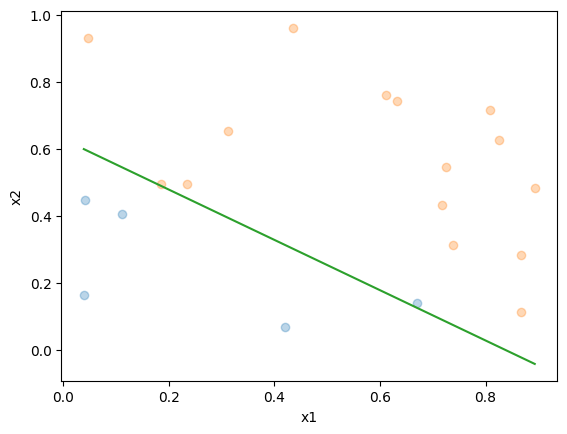

In [84]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, training_algorithm=DescidaGradiente()):
    self.w = None
    self.activation = sign
    self.training_algorithm = training_algorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.training_algorithm.getW(Xb, y)

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.945
[ 1.30176956 -1.55318988 -2.06840442]


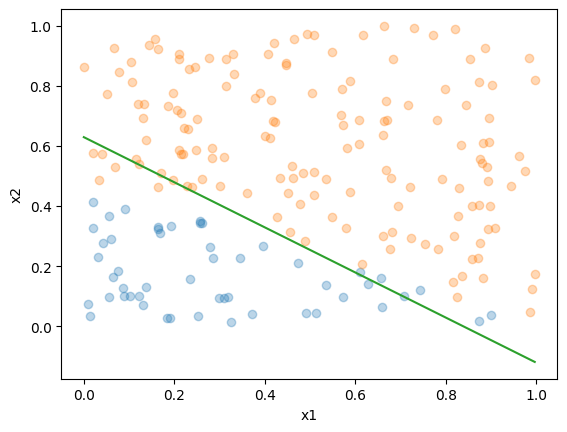

In [85]:
Xte, yte = criaDataset(200, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])

In [86]:
algs = [PseudoInversa(), DescidaGradiente()]
for alg in algs:
  clf = Perceptron(alg)
  clf.fit(X,y)
  print(accuracy_score(yte, clf.predict(Xte)))

0.95
0.945
